In [1]:
import tensorflow as tf
import numpy as np 
import cv2
import datetime
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
%load_ext tensorboard

In [3]:
from tensorflow.keras.datasets.mnist import load_data

In [4]:
(X_train,y_train),(X_test,y_test) = load_data()

In [5]:
print("There are ", len(X_train), "images in the training dataset")     # checking total number of records / data points available in the X_train dataset
print("There are ", len(X_test), "images in the test dataset")     # checking total number of records / data points available in the X_test dataset

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
X_train[0].shape

(28, 28)

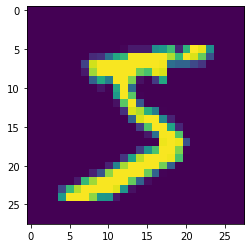

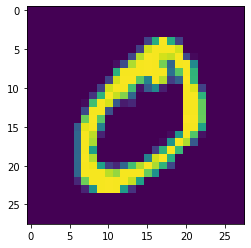

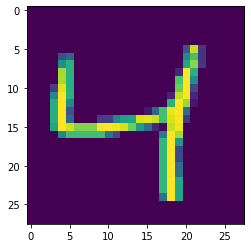

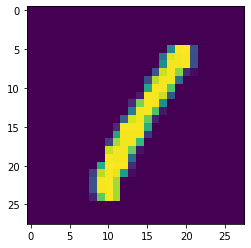

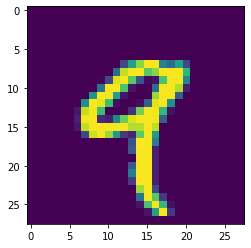

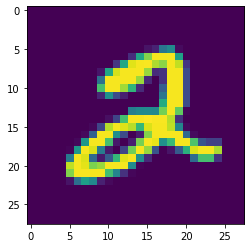

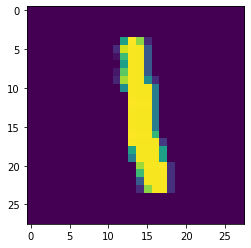

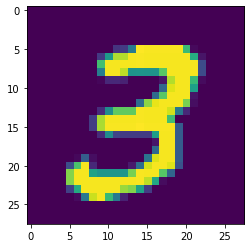

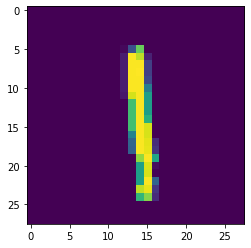

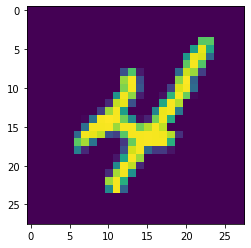

In [7]:
for i in range(10):
    plt.imshow(X_train[i])
    plt.show()

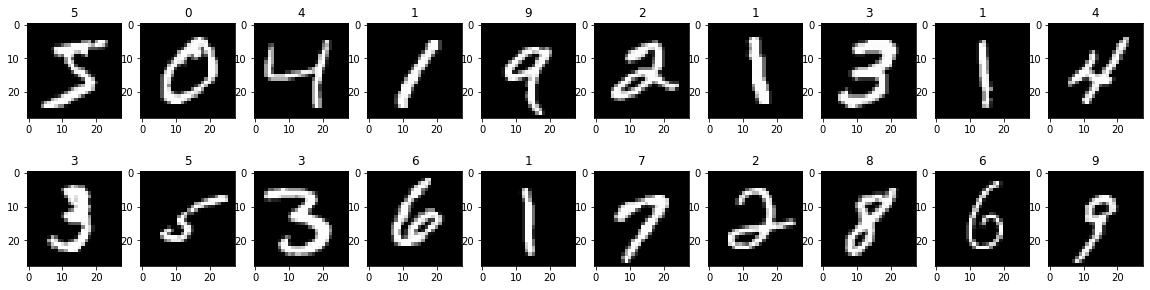

In [8]:
batch_size=20

fig = plt.figure(figsize=(20,5))

for idx in np.arange(batch_size):
    ax = fig.add_subplot(2,(batch_size)/2,idx+1)
    ax.imshow(np.squeeze(X_train[idx]),cmap="gray")
    ax.set_title(y_train[idx])

In [9]:

X_train = X_train / 255
X_test = X_test / 255

"""
Why divided by 255?
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. """

'\nWhy divided by 255?\nThe pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. '

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train_flattened = X_train.reshape(-1, 28*28)    # converting our 2D array representin an image to one dimensional
X_test_flattened = X_test.reshape(-1, 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened.shape

(10000, 784)

### Model

In [15]:
from tensorflow.keras import Model

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import Input

In [17]:
inp = Input(shape=(784,))

hid = layers.Dense(20,activation = 'relu')(inp)
hid = layers.BatchNormalization()(hid)
hid = layers.Dropout(rate=0.4)(hid)

hid_2 = layers.Dense(15,activation = 'relu')(hid)

out = layers.Dense(10,activation = 'softmax')(hid_2)

model = Model(inputs= inp , outputs = out)

In [18]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 16,255
Trainable params: 16,215
Non-trainable params: 40
_________________________________________________

In [19]:
model.compile(optimizer = "adam", loss='sparse_categorical_crossentropy',metrics=['accuracy'])

path = "log/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)

In [20]:
model.fit(X_train_flattened,y_train,epochs=20, validation_data=(X_test_flattened,y_test),callbacks=[tensorboard_callback])

Epoch 1/20
   1/1875 [..............................] - ETA: 0s - loss: 2.7896 - accuracy: 0.0312WARNING:tensorflow:From /home/sid/.local/lib/python3.6/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7781 - accuracy: 0.7556 - val_loss: 0.3050 - val_accuracy: 0.9073
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5132 - accuracy: 0.8427 - val_loss: 0.2820 - val_accuracy: 0.9168
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4725 - accuracy: 0.8575 - val_loss: 0.2433 - val_accuracy: 0.9251
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4525 - accuracy: 0.8637 - val_loss: 0.2385 - val_accuracy: 0.9286
Epoch 5/20
1875/1875 [==============================] 

In [32]:
# %tensorboard --logdir log/fit #for showing tensorboard


In [30]:
!kill 7209

/bin/sh: 1: kill: No such process



In [22]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 934us/step - loss: 0.2003 - accuracy: 0.9392


[0.200310617685318, 0.9391999840736389]

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.8937358e-04, 5.7130507e-07, 7.5052859e-04, 3.7250700e-04,
       1.6226211e-06, 3.4521581e-05, 2.0144479e-07, 9.9845135e-01,
       2.7556174e-05, 1.7173569e-04], dtype=float32)

In [24]:
np.argmax(y_predicted[0])

7

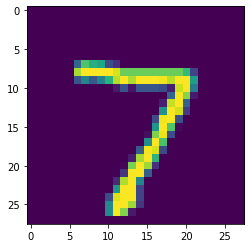

In [25]:
plt.imshow(X_test[0])

In [26]:
# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/keras_mnist.h5 


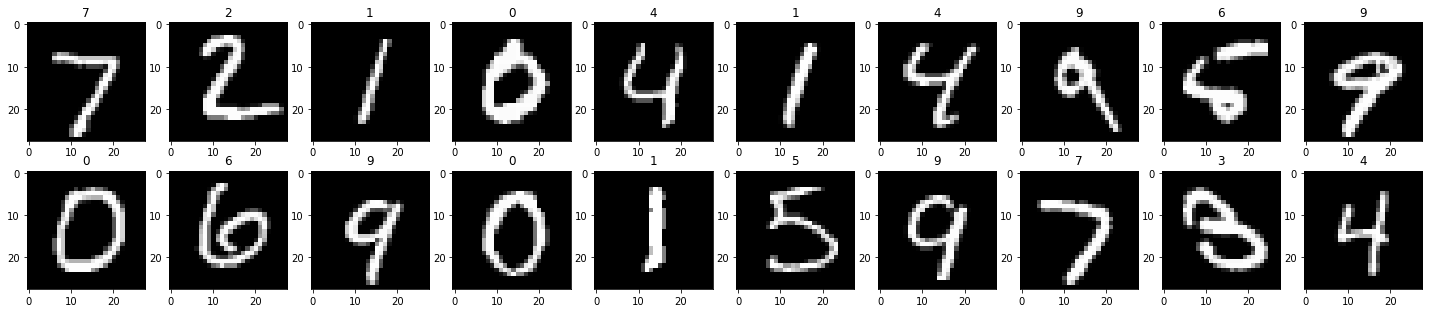

In [27]:
batch_size=20

fig = plt.figure(figsize=(25,5))

for idx in np.arange(batch_size):
    ax = fig.add_subplot(2,(batch_size)/2,idx+1)
    ax.imshow(X_test[idx],cmap="gray")
    ax.set_title(np.argmax(y_predicted[idx]))